In [2]:
# Import the appropriate packages for the project

import numpy as np 
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns

College Majors Analysis Project
===============================


Introduction
------------

For many college students they reach a point in their studies where they must ask themselves a very import question: "Is it worth it for me to go to graduate school?" Some areas seem like it's a requirement if your goal is to make a average or above average salary. Some areas, especially those within STEM, allow for students to enter the workforce right after college and land a decent job. However, everyone's different and it can be difficult to find out just how much post-secondary level education you really need for that dream job of yours (outside of specific situations like Nursing students who need to go to Med School). The purpose of our project is to find majors that benefit the most from making the decision to go to grad school. We'll decide this using factors like median salary and unemployment rate of those who went to graduate school for said degrees.

Project Goals
------------

This project attempts to use Python to do a statistical and visual analysis of the benefits of getting a graduate degree and identify which industries/majors benefit the most from a graduate degree. Our team decided to focus our analysis on median salary and unemployment rate. We decided to use these 2 variables, because we believethat they best represent the 2 biggest reasons why people get a graduate degree. Those reasons being to make more money, represented by median salary, and to have more opportunities, represnted by unemployment rate. We will attempt to implement the use of pandas, numpy, and stats packages to run descriptive statistics and find any statistical differences in the median salaries and unemployment rates between the graduate and undergraduate data. We will also attempt to implement the use of matplotlib and seaborn to create visuals that aid in our analysis.​

Dataset
-------

The dataset that our team decided to use is the college majors dataset made available by fivethirtyeight.com. This dataset contains several .csv files that break down the data into many different subsets. However, we decided to focus our analysis on the all-ages.csv and the grad-students.csv. The all-ages.csv file contains basic earnings and labor force information for 173 college majors. It also contains a more detailed breakdown, including by sex and by the type of job they got.​ The grad-students.csv file similarlly contains basic earnings and labor force information for 173 graduate degrees.​

To read in the data we used the read_csv function from the pandas package in python. This allowed us to read in both the all-ages.csv and the grad-students.csv as dataframes, which helped us tremendously in our analysis. We also decided to use the .head() function on both dataframes so that we could get a good look at the data that we were dealing with. Lastly, we created a new column in the graduate dataframe that calculates the difference in graduate and undergraduate median salary.

In [3]:
# Read in all-ages.csv as majors
majors = pd.read_csv('college-majors/all-ages.csv')
majors.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [4]:
# Read in grad-students.csv as grad_df
grad_df = pd.read_csv('college-majors/grad-students.csv')
grad_df.head()

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000.0,...,86062,73607,62435,3928,0.050661,65000.0,47000,98000.0,0.096320,0.153846
1,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,60000.0,...,461977,347166,250596,25484,0.068386,48000.0,34000,71000.0,0.104420,0.250000
2,6211,HOSPITALITY MANAGEMENT,Business,24417,437,18368,14784,1465,0.073867,65000.0,...,179335,145597,113579,7409,0.048423,50000.0,35000,75000.0,0.119837,0.300000
3,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,47000.0,...,37575,29738,23249,1661,0.052900,41600.0,29000,60000.0,0.125878,0.129808
4,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,57000.0,...,53819,43163,34231,3389,0.072800,52000.0,36000,78000.0,0.144753,0.096154


In [5]:
# Creating a new column Diff_median that calculates the difference in Graduate and Undergraduate median salaries
grad_df['Diff_median'] = grad_df['Grad_median'] - grad_df['Nongrad_median']

Exploratory Data Analysis
-------------------------

For our exploratory data analysis, we wanted to run a few descriptive statistics and create a couple of visualizations focused on Median Salary and Unemployemnt Rate. In this section of our project we simply want to find and quantify what benefits there are to getting a graduate degree, if any, specifically when looking at Median Salary and Unemployment Rate.

In [7]:
# Filter for just the Graduate and Undergraduate median salary columns
grad_salary = grad_df['Grad_median']
undergrad_salary = grad_df['Nongrad_median']

In [8]:
# Calculate and print the average Graduate and Undergraduate median salaries
print('The average graduate salary is: $', grad_salary.mean().round(2))
print('The average undergraduate salary is: $', undergrad_salary.mean().round(2))

# Calculate and print the average difference in Graduate and Undergraduate median salaries 
print('People with graduate degrees make $', grad_df['Diff_median'].mean().round(2),'more on avergae')

The average graduate salary is: $ 76755.78
The average undergraduate salary is: $ 58583.82
People with graduate degrees make $ 18171.97 more on avergae


In [9]:
# Set custom graphing and theme parameters for our visualizations
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.titlesize": 25}
sns.set_theme(style="ticks", rc=custom_params)

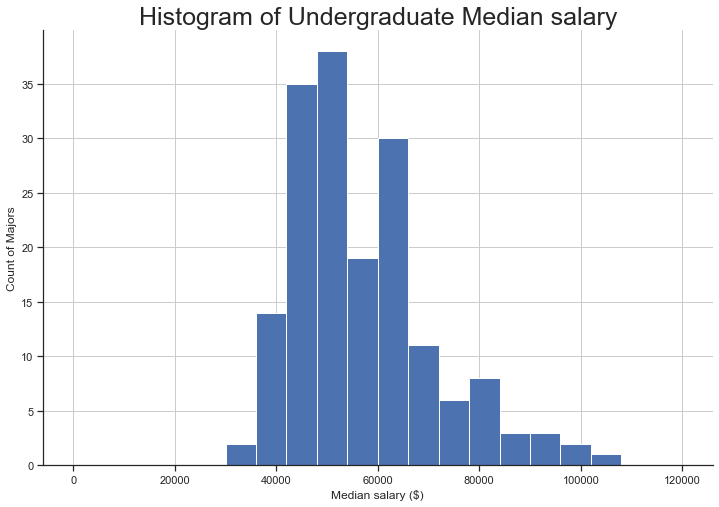

In [11]:
# Create a histogram that shows the distribution of median Undergraduate salaries
salary_hist = majors['Median'].hist(bins=20, range=(0, 120000), figsize=(12,8))

# Give the graph a title and axis labels
salary_hist.set_title("Histogram of Undergraduate Median salary")
salary_hist.set_xlabel("Median salary ($)")
salary_hist.set_ylabel("Count of Majors")

# Show the graph
plt.show()

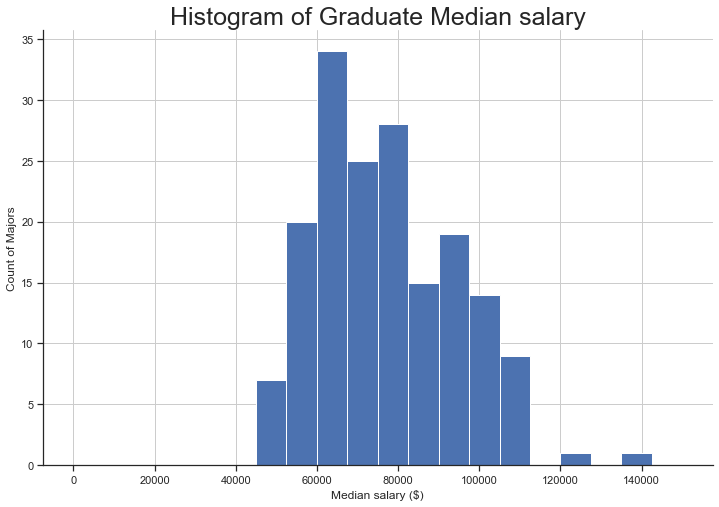

In [12]:
# Create a histogram that shows the distribution of median Graduate salaries
grad_salary_hist = grad_df['Grad_median'].hist(bins=20, range=(0, 150000), figsize=(12,8))

# Give the graph a title and axis labels
grad_salary_hist.set_title("Histogram of Graduate Median salary")
grad_salary_hist.set_xlabel("Median salary ($)")
grad_salary_hist.set_ylabel("Count of Majors")

# Show the graph
plt.show()

In [13]:
# Calculate and print the average unemployment rate for Graduates and Undergraduates
print('The average undergraduate unemployment rate is', 100 * majors['Unemployment_rate'].mean().round(4))
print('The average graduate unemployment rate is', 100 * grad_df['Grad_unemployment_rate'].mean().round(4))

# Calculate and print the average difference in unemployment rate between Graduates and Undergraduates
print('The average undergraduate unemployment rate is', 100 * (majors['Unemployment_rate'].mean().round(4) - grad_df['Grad_unemployment_rate'].mean().round(4)))

The average undergraduate unemployment rate is 5.74
The average graduate unemployment rate is 3.93
The average undergraduate unemployment rate is 1.8099999999999998


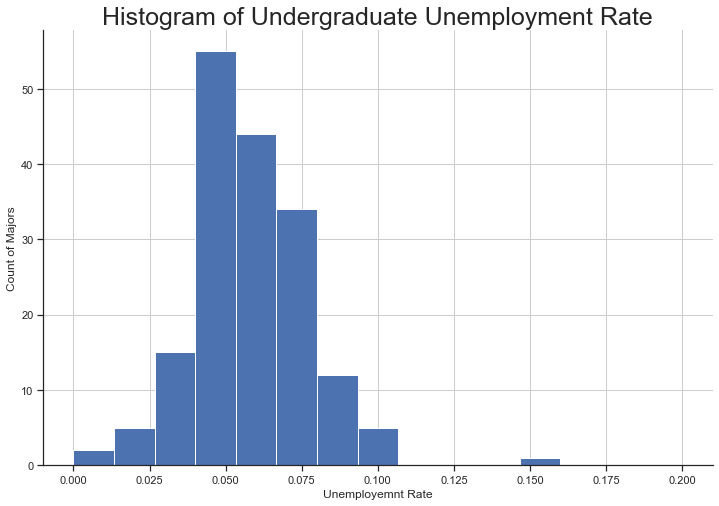

In [14]:
# Create a histogram that shows the distribution of Undergraduate unemployment rates
unemployment_hist = majors['Unemployment_rate'].hist(bins=15, range=(0,0.2), figsize=(12,8))

# Give the graph a title and axis labels
unemployment_hist.set_title("Histogram of Undergraduate Unemployment Rate")
unemployment_hist.set_xlabel("Unemployemnt Rate")
unemployment_hist.set_ylabel("Count of Majors")

# Show the graph
plt.show()

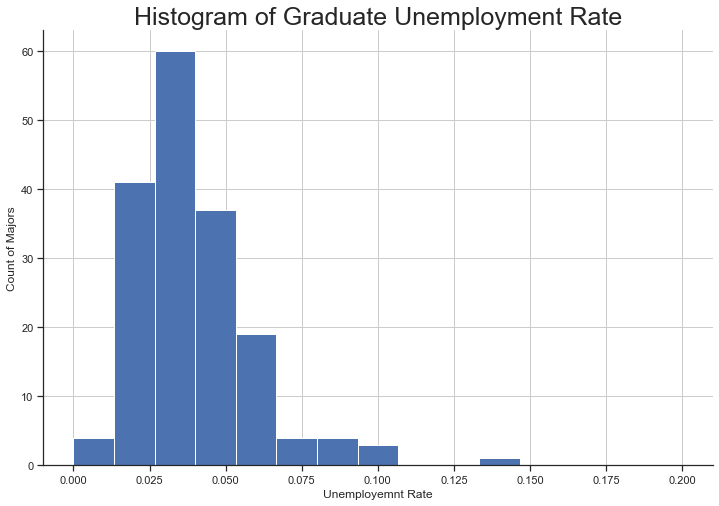

In [15]:
# Create a histogram that shows the distribution of Graduate unemployment rates
grad_unemployment_hist = grad_df['Grad_unemployment_rate'].hist(bins=15, range=(0,0.2), figsize=(12,8))

# Give the graph a title and axis labels
grad_unemployment_hist.set_title("Histogram of Graduate Unemployment Rate")
grad_unemployment_hist.set_xlabel("Unemployemnt Rate")
grad_unemployment_hist.set_ylabel("Count of Majors")

#Show the graph
plt.show()

Hypothesis Testing
------------------

We decided that we would run a paired samples t-test on the equality of means. 
To do that we used the stats.ttest_rel() function from the stats package. 

Null Hypothesis: µ1 = µ2, or the average median salaries are equal
Alternative Hypothesis: µ1 ≠ µ2, or the average median salaries are not equal
Alpha level: 0.05
First, we must check the paired samples t-test assumptions that the distribution of the two groups follows a normal distribution.


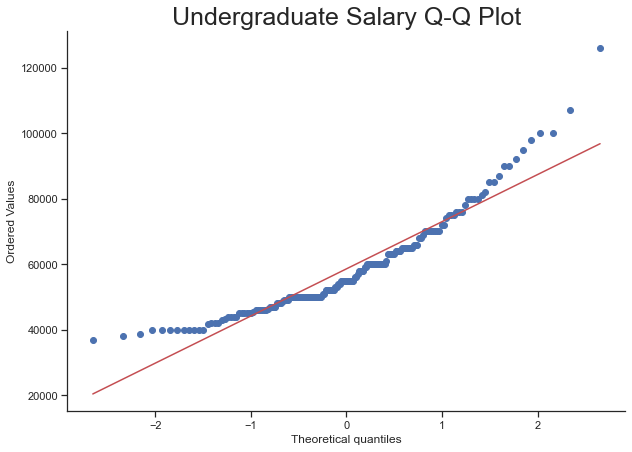

In [16]:
# Use stats.probplot to check for normality of the median undergraduate salaries using a Q-Q Plot
plt.figure(figsize = (10,7))
stats.probplot(undergrad_salary, dist="norm", plot= plt)

# Give the graph a title
plt.title("Undergraduate Salary Q-Q Plot")
plt.show()

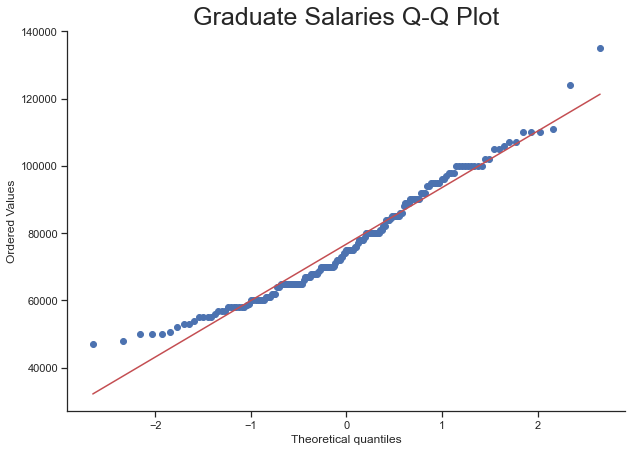

In [17]:
# Use stats.probplot to check for normality of the median graduate salaries using a Q-Q Plot
plt.figure(figsize = (10,7))
stats.probplot(grad_salary, dist="norm", plot= plt)

# Give the graph a title
plt.title("Graduate Salaries Q-Q Plot")
plt.show()

In [18]:
# Use stats.ttest_rel to run a paired samples t-test on the equality of means
stats.ttest_rel(grad_salary, undergrad_salary)

Ttest_relResult(statistic=24.05493208083536, pvalue=6.421691649898644e-57)

P-value = 0.000 <br>
Since the p-value is less than the selected alpha level of 0.05, we reject the null hypothesis, and we can conclude that there is a statistically significant difference in the average median salaries earned by workers with a graduate degree and those with just an undergraduate degree.


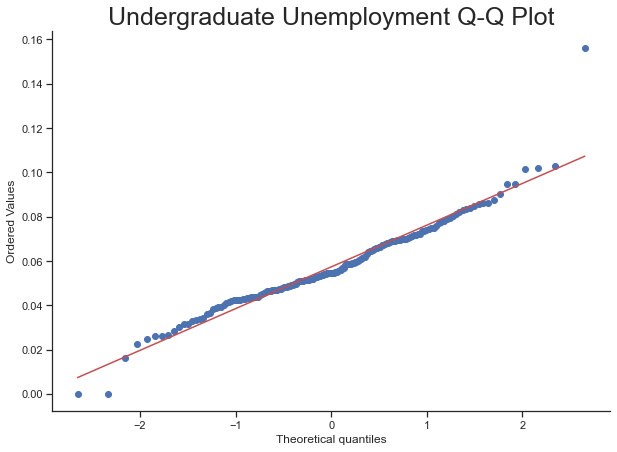

In [19]:
# Use stats.probplot to check for normality of the undergrauate unemployment rate using a Q-Q Plot
plt.figure(figsize=(10,7))
stats.probplot(majors['Unemployment_rate'], dist="norm", plot= plt)

# Give the graph a title
plt.title("Undergraduate Unemployment Q-Q Plot")
plt.show()

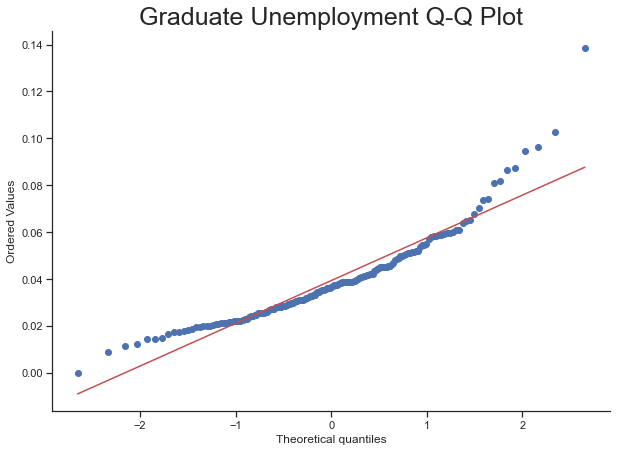

In [20]:
# Use stats.probplot to check for normality of the undergrauate unemployment rate using a Q-Q Plot
plt.figure(figsize=(10,7))
stats.probplot(grad_df['Grad_unemployment_rate'], dist="norm", plot= plt)

# Give the graph a title
plt.title("Graduate Unemployment Q-Q Plot")
plt.show()

In [21]:
# Use stats.ttest_rel to run a paired samples t-test on the equality of means
stats.ttest_rel(majors['Unemployment_rate'], grad_df['Grad_unemployment_rate'])

Ttest_relResult(statistic=8.318880012182316, pvalue=2.624753483772348e-14)

P-value = 0.000 <br>
Since the p-value is less than the selected alpha level of 0.05, we reject the null hypothesis, and we can conclude that there is a statistically significant difference in the average unemployment rates earned by workers with a graduate degree and those with just an undergraduate degree.


Analysis by Major Category & Major
---------------------------------

In [22]:
# Use groupby to calculate the average median salary by Major category for both Graduates and Undergraduates
# Use sort_values to sort the average median salaries in descending order
avg_salary = majors.groupby('Major_category')['Median'].mean().reset_index(name = 'avg_salary').sort_values('avg_salary', ascending = False)
grad_avg_salary = grad_df.groupby('Major_category')['Grad_median'].mean().reset_index(name = 'avg_salary').sort_values('avg_salary', ascending = False)

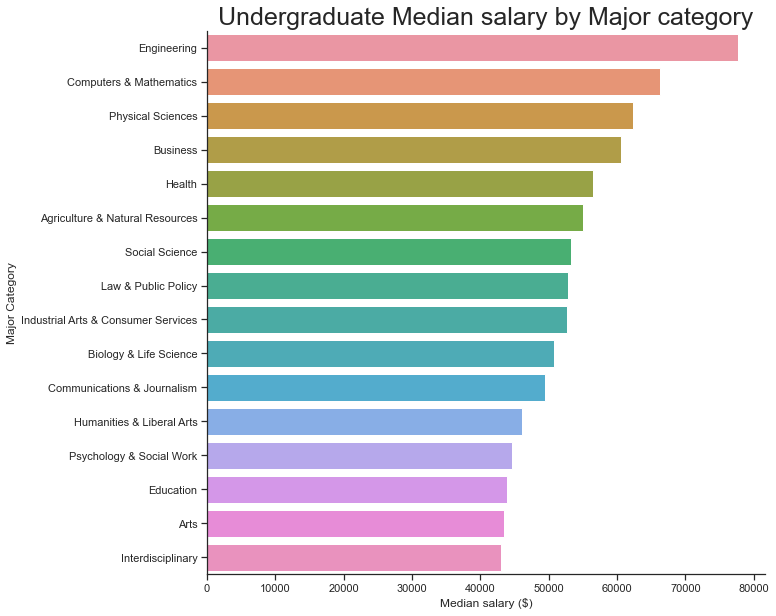

In [23]:
# Create a horizontal barchart of average Undergraduate Median salary by Major category
plt.figure(figsize=(10, 10))
salary_bar = sns.barplot(x = 'avg_salary', y = 'Major_category', data = avg_salary, orient = 'h', ci = None)

# Give the graph a title and axis labels
salary_bar.set_title("Undergraduate Median salary by Major category")
salary_bar.set_xlabel("Median salary ($)")
salary_bar.set_ylabel("Major Category")

# Show the graph
plt.show()

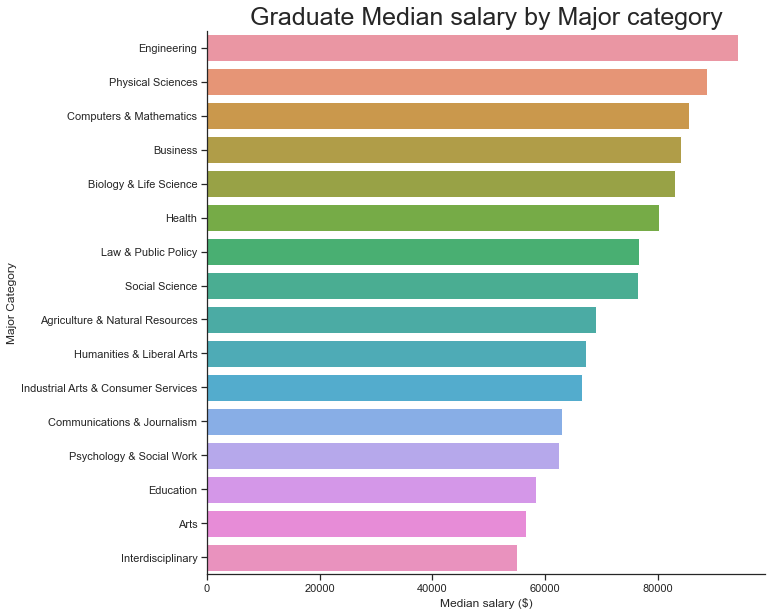

In [24]:
# Create a horizontal barchart of average Graduate Median salary by Major category
plt.figure(figsize=(10, 10))
salary_bar = sns.barplot(x = 'avg_salary', y = 'Major_category', data = grad_avg_salary, orient = 'h', ci = None)

# Give the graph a title and axis labels
salary_bar.set_title("Graduate Median salary by Major category")
salary_bar.set_xlabel("Median salary ($)")
salary_bar.set_ylabel("Major Category")

# Show the graph
plt.show()

In [25]:
# Use groupby to calculate the average difference in median salary between Graduates and Undergraduates by major category
# Use sort_values to sort the average differences in median salaries in descending order
avg_diff = grad_df.groupby('Major_category')['Diff_median'].mean().reset_index(name = 'avg_diff').sort_values('avg_diff', ascending = False)

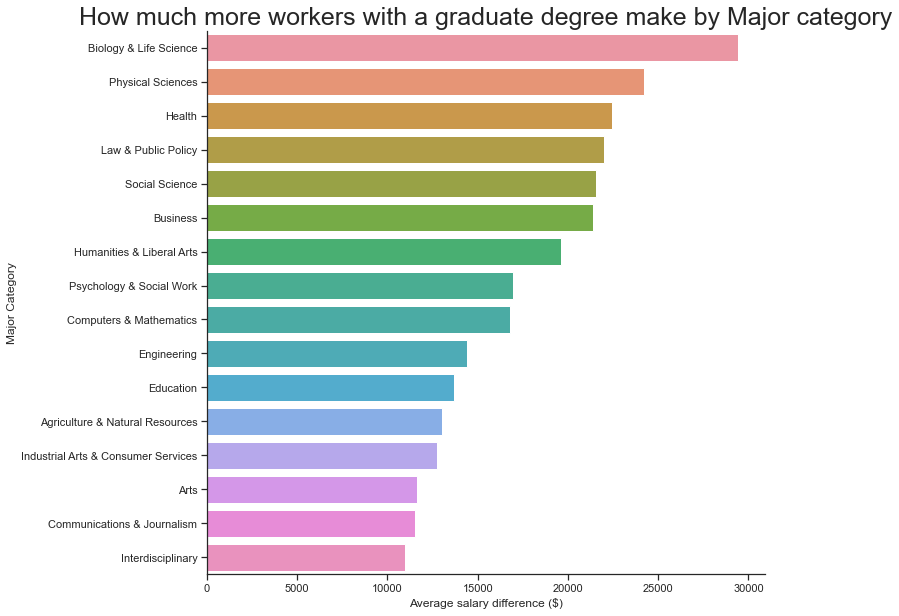

In [26]:
# Create a horizontal barchart of average difference in median salary between Graduates and Undergraduates by Major category
plt.figure(figsize=(10, 10))
salary_bar = sns.barplot(x = 'avg_diff', y = 'Major_category', data = avg_diff, orient = 'h', ci = None)

# Give the graph a title and axis labels
salary_bar.set_title("How much more workers with a graduate degree make by Major category")
salary_bar.set_xlabel("Average salary difference ($)")
salary_bar.set_ylabel("Major Category")

# Show the graph
plt.show()

In [28]:
# Use groupby to calculate the difference in median salary between Graduates and Undergraduates by major 
# Use sort_values to sort the differences in median salaries in descending order
diff_sorted = grad_df.groupby('Major')['Diff_median'].mean().reset_index(name = 'avg_diff').sort_values('avg_diff', ascending = False)

# Use .head() to filter for the top 5 majors with the biggest differences in median salary between Graduates and Undergraduates
top_diff = diff_sorted.head()

# Use .tail() to filter for the bottom 5 majors with the smallest differences in median salary between Graduates and Undergraduates
bottom_diff = diff_sorted.tail()

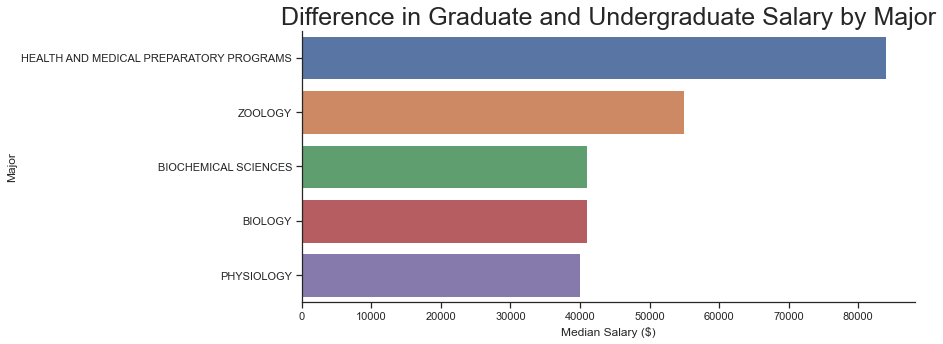

In [31]:
# Create a horizontal barchart of the top 5 majors in difference between Graduate and Undergraduate salaries
plt.figure(figsize=(11, 5))
grad_health_bar = sns.barplot(x = 'avg_diff', y = 'Major', data = top_diff, orient = 'h', ci = None)

# Give the graph a title and axis labels
grad_health_bar.set_title("Difference in Graduate and Undergraduate Salary by Major")
grad_health_bar.set_xlabel("Median Salary ($)")
grad_health_bar.set_ylabel("Major")

# Show the graph
plt.show()

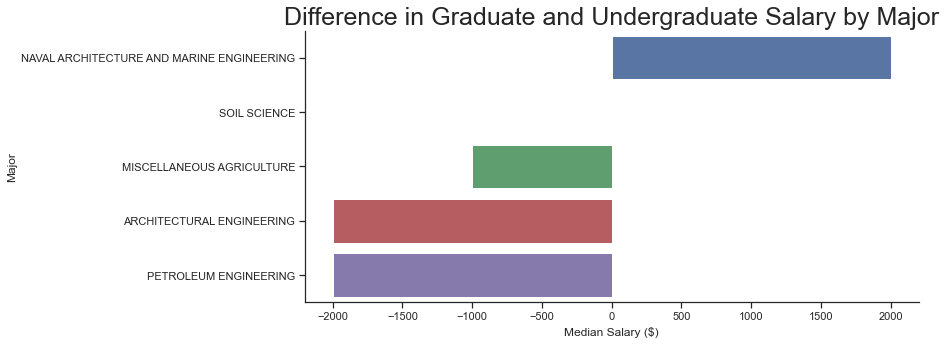

In [30]:
# Create a horizontal barchart of the bottom 5 majors in difference between Graduate and Undergraduate salaries
plt.figure(figsize=(11, 5))
grad_health_bar = sns.barplot(x = 'avg_diff', y = 'Major', data = bottom_diff, orient = 'h', ci = None)

# Give the graph a title and axis labels
grad_health_bar.set_title("Difference in Graduate and Undergraduate Salary by Major")
grad_health_bar.set_xlabel("Median Salary ($)")
grad_health_bar.set_ylabel("Major")

# Show the graph
plt.show()

Conclusions
----------

Through our use of descriptive statistics and hypothesis testing we were able to conclude that there is a significant benefit in both salary and employment for workers with a Graduate degree. Thus, for an average college student it is most likely going to be worth it to go to graduate school. Workers with a graduate degree receive significantly higher salaries (over $18,000 more on average) as well as having access to more employment opportunties as evident from the 1.81% drop in unemployment rate. 

However, there are certain majors where a graduate degree is much less beneficial. 